## Data Splitting and Pre-processing

### Load the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(r"C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\wildfire_frequency\sheffield_wildfire_and_climate .xlsx")

In [5]:
print(df.shape)

(537, 8)


In [6]:
print (df.columns)

Index(['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days',
       'totalrain_mm', 'totalsun_hours', 'wildfire_quantity'],
      dtype='object')


In [7]:
#copy df_original into new df_features
df_features = df.copy()

### Re-create lag features in notebook

In [8]:
#creating lag feature 1, 6, 12

#tmax
df_features['tmax_degC_lag_1'] = df_features['tmax_degC'].shift(1)   # 1-month lag
df_features['tmax_degC_lag_6'] = df_features['tmax_degC'].shift(6)   # 6-month lag
df_features['tmax_degC_lag_12'] = df_features['tmax_degC'].shift(12) # 12-month lag

#totalrain
df_features['totalrain_mm_lag1'] = df_features['totalrain_mm'].shift(1)   # 1-month lag
df_features['totalrain_mm_lag6'] = df_features['totalrain_mm'].shift(6)   # 6-month lag
df_features['totalrain_mm_lag12'] = df_features['totalrain_mm'].shift(12) # 12-month lag

In [9]:
#feature 'year_month'
df_features['year_month'] = df_features['year'].astype(str) + '_' + df_features['month'].astype(str).str.zfill(2)

#feature 'totalrain_mm_avg4'
#feature 'tmax_degC_avg4'
df_features['totalrain_mm_avg4'] = df_features['totalrain_mm'].rolling(window=4, min_periods=1).mean()
df_features['tmax_degC_avg4'] = df_features['tmax_degC'].rolling(window=4, min_periods=1).mean()

In [10]:
df_features['year_month2'] = df_features['year'].astype(str) + '_' + df_features['month'].astype(str).str.zfill(2)

#convert 'year_month' to datetime and extract 'year' and 'month' features
df_features['year_month_dt'] = pd.to_datetime(df_features['year_month2'], format='%Y_%m')
df_features['year'] = df_features['year_month_dt'].dt.year
df_features['month'] = df_features['year_month_dt'].dt.month

#feature 'month_sin' and 'month_cos'
df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)

#verify features
print("Final columns:")
print(df_features.columns.tolist())  

print(df_features['month_sin'])

Final columns:
['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days', 'totalrain_mm', 'totalsun_hours', 'wildfire_quantity', 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 'year_month2', 'year_month_dt', 'month_sin', 'month_cos']
0      8.660254e-01
1      5.000000e-01
2      1.224647e-16
3     -5.000000e-01
4     -8.660254e-01
           ...     
532   -8.660254e-01
533   -1.000000e+00
534   -8.660254e-01
535   -5.000000e-01
536   -2.449294e-16
Name: month_sin, Length: 537, dtype: float64


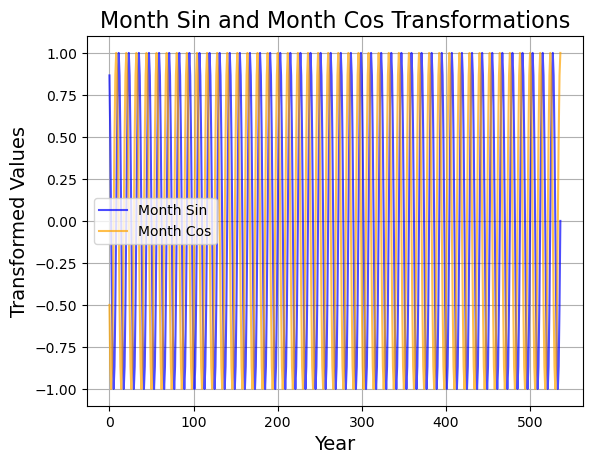

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plot month_sin and month_cos
#plt.figure(figsize=(14, 7))

plt.plot(df_features.index, df_features['month_sin'], label='Month Sin', color='blue', alpha=0.7)
plt.plot(df_features.index, df_features['month_cos'], label='Month Cos', color='orange', alpha=0.7)

#customisation 
plt.title('Month Sin and Month Cos Transformations', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Transformed Values', fontsize=14)
plt.legend()
plt.grid()
#plt.show()


In [12]:
df_features.rename(columns={'wildfire_quantity': 'wildfire_frequency'}, inplace=True)

In [13]:
print(df_features.columns.tolist())

['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days', 'totalrain_mm', 'totalsun_hours', 'wildfire_frequency', 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 'year_month2', 'year_month_dt', 'month_sin', 'month_cos']


In [14]:
#drop features from above list
df_features.drop(columns=['tmin_degC', 'month', 'year_month_dt', 'year_month2'], inplace=True)

In [15]:
print(df_features.columns.tolist())

['year', 'tmax_degC', 'airfrost_days', 'totalrain_mm', 'totalsun_hours', 'wildfire_frequency', 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 'month_sin', 'month_cos']


### Data Splitting train_test_split()

In [16]:
#Attempting train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split

#target
Y = df_features['wildfire_frequency']

#feature variables
X = df_features[['year', 'tmax_degC', 'airfrost_days', 
                 'totalrain_mm', 'totalsun_hours', 'wildfire_frequency', 
                 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 
                 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 
                 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 
                 'month_sin', 'month_cos']]

train_size = 0.7
test_val_size = 1 - train_size  # This will be 0.3 (15% each for test and validation)

#first, split into training and a temporary test/validation set (X_temp, Y_temp
split_index = int(len(df) * train_size)

X_train, X_temp = X.iloc[:split_index], X.iloc[split_index:]
Y_train, Y_temp = Y.iloc[:split_index], Y.iloc[split_index:]

#Now split the temporary test/validation set into test and validation (15% each), suffle=false to ensure chronological order
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, shuffle=False)

#check the split sizes
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')

Training set size: 375
Test set size: 81
Validation set size: 81


In [17]:
print(X_train['year_month'])

0      1976_04
1      1976_05
2      1976_06
3      1976_07
4      1976_08
        ...   
370    2007_02
371    2007_03
372    2007_04
373    2007_05
374    2007_06
Name: year_month, Length: 375, dtype: object


In [18]:
print(X_test['year_month'])

375    2007_07
376    2007_08
377    2007_09
378    2007_10
379    2007_11
        ...   
451    2013_11
452    2013_12
453    2014_01
454    2014_02
455    2014_03
Name: year_month, Length: 81, dtype: object


In [19]:
print(X_val['year_month'])

456    2014_04
457    2014_05
458    2014_06
459    2014_07
460    2014_08
        ...   
532    2020_08
533    2020_09
534    2020_10
535    2020_11
536    2020_12
Name: year_month, Length: 81, dtype: object


### Data Splitting TimeSeriesSplit()

In [21]:
#Trying again but splittig of all data, not just test and train

from sklearn.model_selection import TimeSeriesSplit

# Define X (features) and Y (target)
Y = df_features['wildfire_frequency']
X = df_features[['year', 'tmax_degC', 'airfrost_days', 
                 'totalrain_mm', 'totalsun_hours', 'wildfire_frequency', 
                 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12', 
                 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 
                 'year_month', 'totalrain_mm_avg4', 'tmax_degC_avg4', 
                 'month_sin', 'month_cos']]

# TimeSeriesSplit for cross-validation with 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Defining dictionaries to store the train/validation/test folds
X_train_folds = {}
X_val_folds = {}
X_test_folds = {}
Y_train_folds = {}
Y_val_folds = {}
Y_test_folds = {}

# Enumerate through the splits and save the train/test indices into variables
for fold_idx, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    # Save the train data for X and Y
    X_train_folds[f'train_fold_{fold_idx}'] = X.iloc[train_index]
    Y_train_folds[f'train_fold_{fold_idx}'] = Y.iloc[train_index]
    
    # Split the test fold into validation and test sets (80% validation, 20% test as an example)
    test_size = len(test_index)
    val_size = int(0.5 * test_size)
    
    X_val_folds[f'val_fold_{fold_idx}'] = X.iloc[test_index[:val_size]]
    X_test_folds[f'test_fold_{fold_idx}'] = X.iloc[test_index[val_size:]]
    
    Y_val_folds[f'val_fold_{fold_idx}'] = Y.iloc[test_index[:val_size]]
    Y_test_folds[f'test_fold_{fold_idx}'] = Y.iloc[test_index[val_size:]]

    # Print the sizes of each fold for verification
    print(f'Fold {fold_idx} -> Train size: {len(train_index)}, Validation size: {val_size}, Test size: {test_size - val_size}')

# How to access: 
# X_train_folds['train_fold_1'], X_val_folds['val_fold_1'], X_test_folds['test_fold_1']
# Y_train_folds['train_fold_1'], Y_val_folds['val_fold_1'], Y_test_folds['test_fold_1']

Fold 1 -> Train size: 92, Validation size: 44, Test size: 45
Fold 2 -> Train size: 181, Validation size: 44, Test size: 45
Fold 3 -> Train size: 270, Validation size: 44, Test size: 45
Fold 4 -> Train size: 359, Validation size: 44, Test size: 45
Fold 5 -> Train size: 448, Validation size: 44, Test size: 45


In [33]:
print(X_train_folds['train_fold_1']['year'])

0     1976
1     1976
2     1976
3     1976
4     1976
      ... 
87    1983
88    1983
89    1983
90    1983
91    1983
Name: year, Length: 92, dtype: int32


In [34]:
print(X_train_folds['train_fold_2']['year'])

0      1976
1      1976
2      1976
3      1976
4      1976
       ... 
176    1990
177    1991
178    1991
179    1991
180    1991
Name: year, Length: 181, dtype: int32


In [35]:
X_val_folds['val_fold_1']['year']

92     1983
93     1984
94     1984
95     1984
96     1984
97     1984
98     1984
99     1984
100    1984
101    1984
102    1984
103    1984
104    1984
105    1985
106    1985
107    1985
108    1985
109    1985
110    1985
111    1985
112    1985
113    1985
114    1985
115    1985
116    1985
117    1986
118    1986
119    1986
120    1986
121    1986
122    1986
123    1986
124    1986
125    1986
126    1986
127    1986
128    1986
129    1987
130    1987
131    1987
132    1987
133    1987
134    1987
135    1987
Name: year, dtype: int32

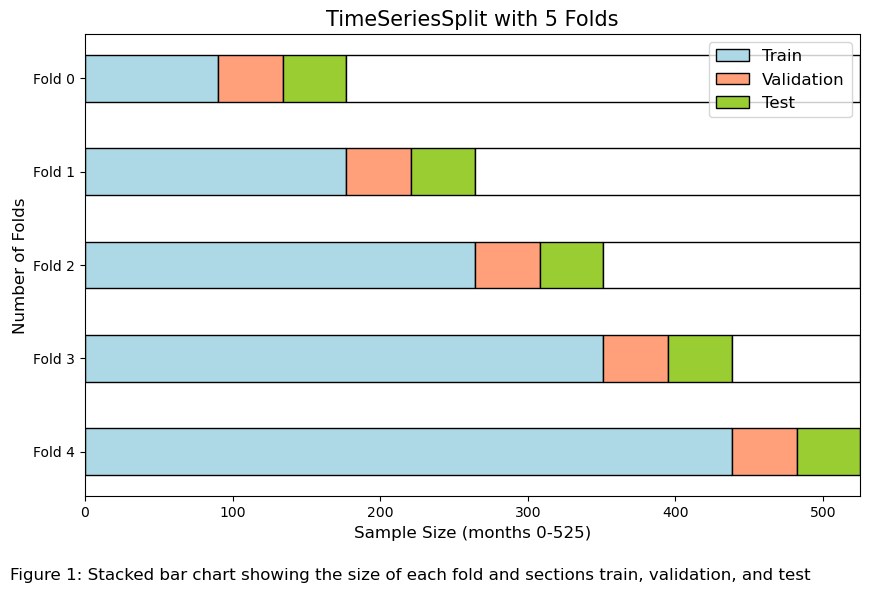

In [28]:
import matplotlib.pyplot as plt

#number of folds
folds = 5

#sizes of train and test data for each fold (from previous split)
train_sizes = [90,177,264,351,438]
val_sizes = [43,43,43,43,43]
test_sizes = [44,44,44,44,44]

#Total size of the test set (375 samples)
total_size = 525

#fold labels (y-axis) - reversed to have Fold 0 at the top
fold_labels = [f'Fold {i}' for i in range(folds-1, -1, -1)]

#set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#create horizontal stacked bars
for i in range(folds):
    #plot train section
    ax.barh(folds-1-i, train_sizes[i], color='lightblue', edgecolor='black', height=0.5, label='Train' if i == 0 else "")
    
    #plot test section 
    ax.barh(folds-1-i, test_sizes[i], left=train_sizes[i], color='lightsalmon', edgecolor='black', height=0.5, label='Validation' if i == 0 else "")

    ax.barh(folds-1-i, val_sizes[i], left=train_sizes[i] + test_sizes[i], color='yellowgreen', edgecolor='black', height=0.5, label='Test' if i == 0 else "")
    
    #plot the remaining portion (white with black outline) for folds 0-3 (not needed for fold 4 since it's fully used)
    if i < folds-1:
        remaining = total_size - (train_sizes[i] + test_sizes[i] + val_sizes[i])
        ax.barh(folds-1-i, remaining, left=train_sizes[i] + test_sizes[i] + val_sizes[i], color='white', edgecolor='black', height=0.5)

#set labels, limits, and title
ax.set_yticks(range(folds))
ax.set_yticklabels(fold_labels)
ax.set_xlim(0, total_size)
ax.set_xlabel('Sample Size (months 0-525)', fontsize=12)
ax.set_ylabel('Number of Folds', fontsize=12)
ax.set_title('TimeSeriesSplit with 5 Folds', fontsize=15)
ax.legend(loc='upper right', fontsize=12)

plt.figtext(0.05, -0.03, 'Figure 1: Stacked bar chart showing the size of each fold and sections train, validation, and test', size=12)

plt.savefig('timeseriessplit_diagram.png')

plt.show()



### Pre-processing 

In [37]:
#features to calculate min and max for
features = ['year', 'year_month', 'month_sin', 'month_cos', 
            'airfrost_days', 
            'totalsun_hours', 
            'tmax_degC', 'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12','tmax_degC_avg4',
            'totalrain_mm', 'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 'totalrain_mm_avg4']

#calculate min and max for each feature
min_values = df_features[features].min()
max_values = df_features[features].max()

print("Minimum values for each feature:")
print(min_values)
print("\nMaximum values for each feature:")
print(max_values)


Minimum values for each feature:
year                     1976
year_month            1976_04
month_sin                -1.0
month_cos                -1.0
airfrost_days               0
totalsun_hours            5.8
tmax_degC                 1.0
tmax_degC_lag_1           1.0
tmax_degC_lag_6           1.0
tmax_degC_lag_12          1.0
tmax_degC_avg4           4.25
totalrain_mm              4.6
totalrain_mm_lag1         4.6
totalrain_mm_lag6         4.6
totalrain_mm_lag12        4.6
totalrain_mm_avg4        16.2
dtype: object

Maximum values for each feature:
year                     2020
year_month            2020_12
month_sin                 1.0
month_cos                 1.0
airfrost_days              25
totalsun_hours          290.8
tmax_degC                25.6
tmax_degC_lag_1          25.6
tmax_degC_lag_6          25.6
tmax_degC_lag_12         25.6
tmax_degC_avg4         22.025
totalrain_mm            285.6
totalrain_mm_lag1       285.6
totalrain_mm_lag6       285.6
totalrain_mm_lag12 

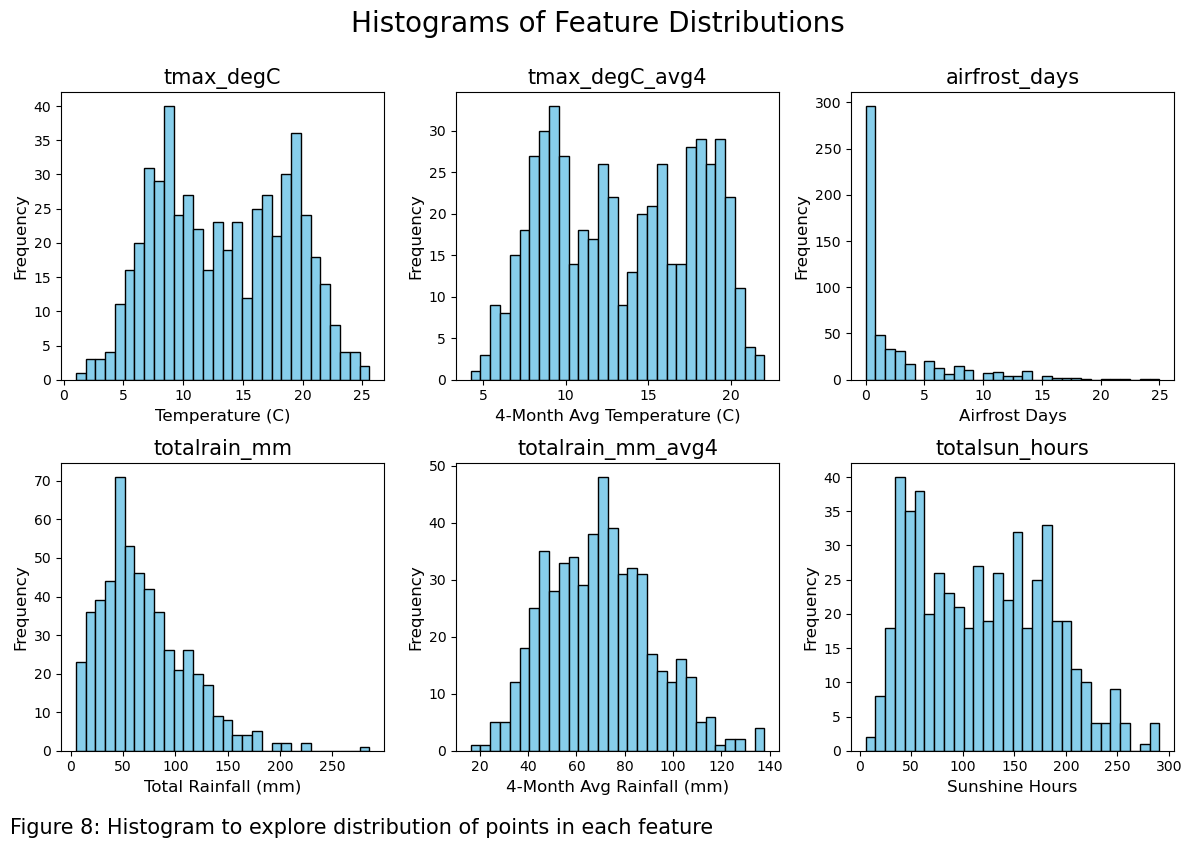

In [38]:
import matplotlib.pyplot as plt

# List of features to plot histograms for
features = ['tmax_degC', 'tmax_degC_avg4', 'airfrost_days', 'totalrain_mm', 'totalrain_mm_avg4', 'totalsun_hours']

# List of x-axis labels corresponding to the features
x_labels = ['Temperature (C)', '4-Month Avg Temperature (C)', 'Airfrost Days', 'Total Rainfall (mm)', '4-Month Avg Rainfall (mm)', 
            'Sunshine Hours']

# Set up the figure and axes for the 3x4 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # 3 rows and 4 columns
fig.suptitle('Histograms of Feature Distributions', fontsize=20, y=1.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and plot a histogram
for i, feature in enumerate(features):
    axes[i].hist(df_features[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{feature}', fontsize=15)
    axes[i].set_xlabel(x_labels[i], fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.figtext(0.01, -0.03, 'Figure 8: Histogram to explore distribution of points in each feature', size=15)

# Show the plots
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

s_ftrs = ['tmax_degC', 'totalsun_hours', 'tmax_degC_avg4', 'totalrain_mm',
          'tmax_degC_lag_1', 'tmax_degC_lag_6', 'tmax_degC_lag_12','tmax_degC_avg4',
          'totalrain_mm_lag1', 'totalrain_mm_lag6', 'totalrain_mm_lag12', 
          'totalrain_mm_avg4', 'month_sin', 'month_cos', 'airfrost_days']

Sscaler = StandardScaler()
print('Training Folds 1:', Sscaler.fit_transform(X_train_folds['train_fold_1'][s_ftrs]))
print('Training Folds 2:', Sscaler.fit_transform(X_train_folds['train_fold_2'][s_ftrs]))
print('Training Folds 3:', Sscaler.fit_transform(X_train_folds['train_fold_3'][s_ftrs]))
print('Training Folds 4:', Sscaler.fit_transform(X_train_folds['train_fold_4'][s_ftrs]))
print('Training Folds 5:', Sscaler.fit_transform(X_train_folds['train_fold_5'][s_ftrs]))

print('X_val_folds', Sscaler.transform(X_val[s_ftrs]))
print('X_test_folds', Sscaler.transform(X_test[s_ftrs]))

Training Folds 1: [[-0.22641546  0.06535632 -0.27983397 ...  1.26195007 -0.67118057
  -0.20301399]
 [ 0.49857529  0.59782333  0.16301635 ...  0.74396928 -1.18916137
  -0.57655972]
 [ 1.64795087  2.26239712  0.77868631 ...  0.03639435 -1.3787555
  -0.57655972]
 ...
 [ 0.67540231  0.0784632   1.58877837 ... -1.3787555   0.03639435
  -0.57655972]
 [ 0.10955587 -0.45891889  1.35115136 ... -1.18916137  0.74396928
  -0.20301399]
 [-0.54470408 -1.36165527  0.56266176 ... -0.67118057  1.26195007
   0.35730462]]
Training Folds 2: [[-0.21590559  0.0437902  -0.26954454 ...  1.21632728 -0.70417879
  -0.21745737]
 [ 0.52381526  0.53623108  0.18239627 ...  0.69939088 -1.2225373
  -0.59774514]
 [ 1.69654345  2.07567703  0.81070422 ... -0.00675737 -1.41226968
  -0.59774514]
 ...
 [-1.46080166 -1.03200373 -1.42695392 ...  1.21632728  0.712003
   2.44455701]
 [-0.39632531 -0.7910865  -1.32223593 ...  1.40553914  0.0039121
  -0.40760125]
 [-0.2700315   0.24379695 -1.06319668 ...  1.21632728 -0.70417879
 

#### old ML code

In [ ]:
#XGBoost with validation
# F1 scorer
f1_scorer = make_scorer(f1_score)

param_grid = {
    'model__n_estimators': [50, 100, 200, 500],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.05],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [0.1, 1, 10], 
    'model__subsample': [0.8, 0.9],
    'model__colsample_bytree': [0.8, 0.9],
}

tscv = TimeSeriesSplit(n_splits=5)

best_models = []
scores_per_fold = {
    'train_f1_scores': [],
    'test_f1_scores': []
}

# data splitting, model training, and evaluation
for fold_idx, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    # train & test
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]
    
    # pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                                scale_pos_weight=scale_pos_weight, random_state=1))
    ])
    
    # GridSearchCV with tscv
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=tscv,
        scoring=f1_scorer,
        refit=True,  # refit best model on the full training data
        n_jobs=-1,  
        verbose=1
    )
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid_search.fit(X_train, Y_train)
    
    # best model from GridSearch
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    print(f"Fold {fold_idx} -> Best Params: {grid_search.best_params_}")
    
    # predict on train & test
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # calculate F1 scores
    train_f1_score = f1_score(Y_train, y_train_pred)
    test_f1_score = f1_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Train F1 Score: {train_f1_score:.4f}")
    print(f"Fold {fold_idx} -> Test F1 Score: {test_f1_score:.4f}")
    
    scores_per_fold['train_f1_scores'].append(train_f1_score)
    scores_per_fold['test_f1_scores'].append(test_f1_score)

# average F1 scores
avg_train_f1 = np.mean(scores_per_fold['train_f1_scores'])
avg_test_f1 = np.mean(scores_per_fold['test_f1_scores'])
print(f"Average Train F1 Score: {avg_train_f1:.4f}")
print(f"Average Test F1 Score: {avg_test_f1:.4f}")


In [ ]:
#logistic regression with GridScearchCV

recall_scorer = make_scorer(recall_score)

# Use multiple metrics for scoring, but prioritize recall
scoring_metrics = ['recall', 'f1', 'roc_auc', 'average_precision']

best_train_score_per_fold = []
best_test_score_per_fold = []

scores_per_fold = {
    'train_f1_scores_per_fold': [],
    'test_f1_scores_per_fold': [],
    'train_recall_scores_per_fold': [],
    'test_recall_scores_per_fold': [],
    'train_roc_auc_scores_per_fold': [],
    'test_roc_auc_scores_per_fold': [],
    'train_avg_precision_scores_per_fold': [],
    'test_avg_precision_scores_per_fold': []
}

X_train_folds = {}
X_test_folds = {}
Y_train_folds = {}
Y_test_folds = {}

best_models = []
model_params = []

#initialise with small values
best_test_score = -np.inf
best_train_score = -np.inf 

#values for confusion matrix
y_train_pred_folds = {}
y_test_pred_folds = {}

#define parameter grid for GridSearch
param_grid = {
    'model__n_estimators': [50, 100, 200, 500],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.05],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [0.1, 1, 10], 
    'model__subsample': [0.8, 0.9],
    'model__colsample_bytree': [0.8, 0.9],
}

# Time series data splitting & preprocessing
for fold_idx, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    # Split the train data
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]

    #confirming chronological order of train and test folds
    #print(f"Fold {fold_idx} - Train set (X):")
    #print(X_train.head()) 
    #print(f"Fold {fold_idx} - Test set (X):")
    #print(X_test.head())

    # Save to dictionaries
    X_train_folds[f'train_fold_{fold_idx}'] = X_train
    X_test_folds[f'test_fold_{fold_idx}'] = X_test
    Y_train_folds[f'train_fold_{fold_idx}'] = Y_train
    Y_test_folds[f'test_fold_{fold_idx}'] = Y_test

    #calculate scale_pos_weight dynamically based on class imbalance
    scale_pos_weight = len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1])

    # initialise StandardScaler and XGBClassifier in a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                                scale_pos_weight=scale_pos_weight, random_state=1))
    ])
    
    # Use GridSearchCV with TimeSeriesSplit for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        #cv=TimeSeriesSplit(n_splits=5),  # Using time series CV here
        scoring=scoring_metrics,
        refit='recall',
        n_jobs=-1,  # Use all cores for parallel processing
        verbose=1
    )

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid_search.fit(X_train, Y_train)
        print("GridSearchCV fitting completed.")
    
    # Best parameters and model
    #best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    print(f"Fold {fold_idx} -> Best Params: {grid_search.best_params_}")

    # predict on train & test set
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    #stor for cm
    y_train_pred_folds[f'fold_{fold_idx}'] = y_train_pred
    y_test_pred_folds[f'fold_{fold_idx}'] = y_test_pred

    #calculate and print each metric for train 
    train_f1_score = f1_score(Y_train, y_train_pred)
    print(f"Fold {fold_idx} -> Train F1 Score: {train_f1_score:.4f}")
    train_recall = recall_score(Y_train, y_train_pred)
    print(f"Fold {fold_idx} -> Train Recall: {train_recall:.4f}")
    train_roc_auc = roc_auc_score(Y_train, y_train_pred)
    print(f"Fold {fold_idx} -> Train ROC AUC: {train_roc_auc:.4f}")
    train_avg_precision = average_precision_score(Y_train, y_train_pred)
    print(f"Fold {fold_idx} -> Train Average Precision: {train_avg_precision:.4f}")
    
    #calculate and print each metric for test 
    test_f1_score = f1_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Test F1 Score: {test_f1_score:.4f}")
    test_recall = recall_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Test Recall: {test_recall:.4f}")
    test_roc_auc = roc_auc_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Test ROC AUC: {test_roc_auc:.4f}")
    test_avg_precision = average_precision_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Test Average Precision: {test_avg_precision:.4f}")
    
    # append to scores per fold dictionary
    scores_per_fold['train_f1_scores_per_fold'].append(train_f1_score)
    scores_per_fold['test_f1_scores_per_fold'].append(test_f1_score)
    scores_per_fold['train_recall_scores_per_fold'].append(train_recall)
    scores_per_fold['test_recall_scores_per_fold'].append(test_recall)
    scores_per_fold['train_roc_auc_scores_per_fold'].append(train_roc_auc)
    scores_per_fold['test_roc_auc_scores_per_fold'].append(test_roc_auc)
    scores_per_fold['train_avg_precision_scores_per_fold'].append(train_avg_precision)
    scores_per_fold['test_avg_precision_scores_per_fold'].append(test_avg_precision)
            
    model_params.append(grid_search.best_params_)
    #print test & train size to check
    #print(f'Fold {fold_idx} -> Train size: {len(train_index)}, Test size: {test_size}')

# print scores per fold
print(f"Train Metrics per Fold: {train_metrics_per_fold}")
print(f"Test Metrics per Fold: {test_metrics_per_fold}")

In [ ]:
# Extract ROC AUC scores from the dictionary
train_recall = scores_per_fold['train_recall_scores_per_fold']
test_recall = scores_per_fold['test_recall_scores_per_fold']

# Print the lengths and scores for debugging
print(f"Length of folds: {len(train_recall)}")
print(f"Train Recall Scores: {train_recall}")
print(f"Test Recall Scores: {test_recall}")

# Create the plot for ROC AUC scores across folds
plt.figure(figsize=(10, 6))
folds = list(range(1, len(train_recall) + 1))  # Fold indices start from 1

# Plot ROC AUC for train and test
plt.plot(folds, train_recall, label='Training Recall', marker='o', linestyle='-', color='b')
plt.plot(folds, test_recall, label='Test Recall', marker='o', linestyle='--', color='r')

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('Training vs Test F1 per Fold')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print(f"Classes in Y_train: {Y_train.unique()}")
print(f"Classes in Y_test: {Y_test.unique()}")

# For the actual labels (true classes)
print("True labels:", np.unique(Y_test))

# For the predicted labels (predicted classes)
print("Predicted labels:", np.unique(y_test_pred))

for fold_idx in range(1, len(y_test_pred_folds) + 1):
    # Get the true labels and predictions for the current fold
    Y_test = Y_test_folds[f'test_fold_{fold_idx}']
    y_test_pred = y_test_pred_folds[f'fold_{fold_idx}']
    
    # Generate confusion matrix
    cm = confusion_matrix(Y_test, y_test_pred, labels=[0, 1])
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for Fold {fold_idx}")
    plt.show()

#### initial linear regression

In [ ]:
#define X & Y

y = df_binary_no_missing_values['wildfire_frequency']
X = df_binary_no_missing_values.drop(columns=['wildfire_frequency'])

In [ ]:
#logistic regression with random seeds

random_states = [37, 1, 49, 16, 22] 

param_grid = {
    'model__C': np.logspace(-2, 2, 21), 
    'model__penalty': ['l2', None],
    'model__solver': ['sag', 'lbfgs', 'newton-cg']
}

# split data into X_other and X_test
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print(f"Original training set shape (X_train, y_train): {X_other.shape}, {y_other.shape}")
print(f"Original test set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")

tscv = TimeSeriesSplit(n_splits=5)  

test_scores = []

for rs_idx, random_state in enumerate(random_states, start=1):
    print(f"\nRandom State {random_state}:")

    # pipeline with random states
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', LogisticRegression(max_iter=1000, tol=1e-4, random_state=random_state))
    ])

    # GridSearchCV with the current random state
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1',
        cv=tscv,
        n_jobs=-1, 
        verbose=1
        )
        
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid_search.fit(X_other, y_other)

    # get the best model
    best_model = grid_search.best_estimator_
    print(f"Best Params for Random State {random_state}: {grid_search.best_params_}")

    # use best model on on X_test
    y_test_pred = best_model.predict(X_test)
    test_score = f1_score(y_test, y_test_pred)
    print(f"Test F1 Score for Random State {random_state}: {test_score}")

    # store test score
    val_scores.append({
        'random_state': random_state,
        'test_score': test_score
    })

# print all results
print("\nFinal Test Scores:")
for result in test_scores:
    print(f"Random State: {result['random_state']}, Test Score: {result['test_score']}")

#mean and standard deviation of test scores


In [ ]:
#Logistic regression with predict_proba

# Initialize structures to store results
X_train_folds = {}
X_test_folds = {}
Y_train_folds = {}
Y_test_folds = {}

y_train_prob_folds = {}
y_test_prob_folds = {}

best_models = []
model_params = []

# Define parameter grid for GridSearch
param_grid = {
    'model__C': np.logspace(0, 0.02, 5), 
    'model__penalty': ['l2', None],
    'model__solver': ['saga', 'sag', 'lbfgs', 'newton-cg']
}

# Time series data splitting & preprocessing
for fold_idx, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    # Split the train and test data
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]

    # Save train and test sets to dictionaries
    X_train_folds[f'train_fold_{fold_idx}'] = X_train
    X_test_folds[f'test_fold_{fold_idx}'] = X_test
    Y_train_folds[f'train_fold_{fold_idx}'] = Y_train
    Y_test_folds[f'test_fold_{fold_idx}'] = Y_test

    # Initialize pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', LogisticRegression(max_iter=1000, tol=1e-4, random_state=1))
    ])

    # Use GridSearchCV with TimeSeriesSplit for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=TimeSeriesSplit(n_splits=5), 
        scoring='roc_auc',  # Only focus on a relevant metric for refitting
        refit=True,         # Ensure it selects the best model based on this
        n_jobs=-1,          # Use all cores for parallel processing
        verbose=1
    )

    # Handle warnings during fitting
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid_search.fit(X_train, Y_train)

    # Store the best model and its parameters
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    best_params = grid_search.best_params_
    model_params.append(best_params)
    print(f"Fold {fold_idx} -> Best Params: {best_params}")

    # Get predicted probabilities for train and test sets
    y_train_prob = best_model.predict_proba(X_train)[:, 1]  # Probability for class 1
    y_test_prob = best_model.predict_proba(X_test)[:, 1]    # Probability for class 1

    # Store probabilities for each fold
    y_train_prob_folds[f'fold_{fold_idx}'] = y_train_prob
    y_test_prob_folds[f'fold_{fold_idx}'] = y_test_prob

    # Print a preview of the probabilities for verification
    print(f"Fold {fold_idx} -> Train Class 1 Probabilities (first 5 samples): {y_train_prob[:5]}")
    print(f"Fold {fold_idx} -> Test Class 1 Probabilities (first 5 samples): {y_test_prob[:5]}")

# Print probability scores for each fold
for fold_idx, _ in enumerate(tscv.split(X), start=1):
    print(f"Fold {fold_idx} -> Train Probabilities: {y_train_pred_folds[f'fold_{fold_idx}'][:5]}")
    print(f"Fold {fold_idx} -> Test Probabilities: {y_test_pred_folds[f'fold_{fold_idx}'][:5]}")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define labels for display
labels = ['No Disease (Class 0)', 'Disease (Class 1)']

# Loop through each fold
for fold_idx in range(1, len(y_train_pred_folds) + 1):
    # Get true and predicted values for train and test sets
    y_train_true = Y_train_folds[f'train_fold_{fold_idx}']
    y_train_pred = y_train_pred_folds[f'fold_{fold_idx}']
    y_test_true = Y_test_folds[f'test_fold_{fold_idx}']
    y_test_pred = y_test_pred_folds[f'fold_{fold_idx}']
    
    # Plot confusion matrix for training set
    cm_train = confusion_matrix(y_train_true, y_train_pred)
    disp_train = ConfusionMatrixDisplay(cm_train, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 4))
    disp_train.plot(ax=ax)
    plt.title(f'Confusion Matrix - Fold {fold_idx} (Train)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Plot confusion matrix for test set
    cm_test = confusion_matrix(y_test_true, y_test_pred)
    disp_test = ConfusionMatrixDisplay(cm_test, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 4))
    disp_test.plot(ax=ax)
    plt.title(f'Confusion Matrix - Fold {fold_idx} (Test)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In [ ]:
#logistic regression with GridScearchCV

fbeta_scorer = make_scorer(fbeta_score, beta=2)

scoring_metrics = {
    'fbeta': fbeta_scorer,
    'f1': 'f1',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision'
}

best_train_score_per_fold = []
best_test_score_per_fold = []

scores_per_fold = {
    'train_f1_scores_per_fold': [],
    'test_f1_scores_per_fold': [],
    'train_recall_scores_per_fold': [],
    'test_recall_scores_per_fold': [],
    'train_roc_auc_scores_per_fold': [],
    'test_roc_auc_scores_per_fold': [],
    'train_avg_precision_scores_per_fold': [],
    'test_avg_precision_scores_per_fold': []
}

X_train_folds = {}
X_test_folds = {}
Y_train_folds = {}
Y_test_folds = {}

best_models = []
model_params = []

#initialise with small values
best_test_score = -np.inf
best_train_score = -np.inf 

#values for confusion matrix
y_train_pred_folds = {}
y_test_pred_folds = {}

#define parameter grid for GridSearch
param_grid = {
    'model__C': np.logspace(0, 0.02, 5), 
    'model__penalty': ['l2', None],
    'model__solver': ['saga', 'sag', 'lbfgs', 'newton-cg']
}

# Time series data splitting & preprocessing
for fold_idx, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    # Split the train data
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]

    #confirming chronological order of train and test folds
    #print(f"Fold {fold_idx} - Train set (X):")
    #print(X_train.head()) 
    #print(f"Fold {fold_idx} - Test set (X):")
    #print(X_test.head())

    # Save to dictionaries
    X_train_folds[f'train_fold_{fold_idx}'] = X_train
    X_test_folds[f'test_fold_{fold_idx}'] = X_test
    Y_train_folds[f'train_fold_{fold_idx}'] = Y_train
    Y_test_folds[f'test_fold_{fold_idx}'] = Y_test
    
    # Initialize StandardScaler and LogisticRegression in a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', LogisticRegression(max_iter=1000, tol=1e-4, random_state=1))
    ])

    #pipeline.fit(X_train, Y_train)
    
    # Use GridSearchCV with TimeSeriesSplit for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=TimeSeriesSplit(n_splits=5), 
        scoring=scoring_metrics,
        refit='fbeta',
        n_jobs=-1,  # Use all cores for parallel processing
        verbose=1
    )
    
        # handle warnings
    with warnings.catch_warnings():
         warnings.simplefilter("ignore")
         grid_search.fit(X_train, Y_train)
    
    # Best parameters and model
    #best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    print(f"Fold {fold_idx} -> Best Params: {best_params}")

    # Get predicted probabilities for train and test sets
    y_train_prob = best_model.predict_proba(X_train)[:, 1]  # Probability for class 1
    y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Probability for class 1

    # Store probabilities
    y_train_pred_folds[f'fold_{fold_idx}'] = y_train_prob
    y_test_pred_folds[f'fold_{fold_idx}'] = y_test_prob

    # predict on train & test set
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    #stor for cm
    y_train_pred_folds[f'fold_{fold_idx}'] = y_train_pred
    y_test_pred_folds[f'fold_{fold_idx}'] = y_test_pred

    #calculate and print each metric for train 
    train_fbeta = fbeta_score(Y_train, y_train_pred, beta=2)
    print(f"Fold {fold_idx} -> Train F-beta Score: {train_fbeta:.4f}")
    train_f1_score = f1_score(Y_train, y_train_pred)
    print(f"Fold {fold_idx} -> Train F1 Score: {train_f1_score:.4f}")
    train_recall = recall_score(Y_train, y_train_pred)
    print(f"Fold {fold_idx} -> Train Recall: {train_recall:.4f}")
    train_roc_auc = roc_auc_score(Y_train, y_train_pred)
    print(f"Fold {fold_idx} -> Train ROC AUC: {train_roc_auc:.4f}")
    train_avg_precision = average_precision_score(Y_train, y_train_pred)
    print(f"Fold {fold_idx} -> Train Average Precision: {train_avg_precision:.4f}")
    
    #calculate and print each metric for test 
    test_fbeta = fbeta_score(Y_test, y_test_pred, beta=2)
    print(f"Fold {fold_idx} -> Test F-beta Score: {test_fbeta:.4f}")
    test_f1_score = f1_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Test F1 Score: {test_f1_score:.4f}")
    test_recall = recall_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Test Recall: {test_recall:.4f}")
    test_roc_auc = roc_auc_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Test ROC AUC: {test_roc_auc:.4f}")
    test_avg_precision = average_precision_score(Y_test, y_test_pred)
    print(f"Fold {fold_idx} -> Test Average Precision: {test_avg_precision:.4f}")
    
    # append to scores per fold dictionary
    scores_per_fold['train_f1_scores_per_fold'].append(train_f1_score)
    scores_per_fold['test_f1_scores_per_fold'].append(test_f1_score)
    scores_per_fold['train_recall_scores_per_fold'].append(train_recall)
    scores_per_fold['test_recall_scores_per_fold'].append(test_recall)
    scores_per_fold['train_roc_auc_scores_per_fold'].append(train_roc_auc)
    scores_per_fold['test_roc_auc_scores_per_fold'].append(test_roc_auc)
    scores_per_fold['train_avg_precision_scores_per_fold'].append(train_avg_precision)
    scores_per_fold['test_avg_precision_scores_per_fold'].append(test_avg_precision)
            
    model_params.append(grid_search.best_params_)
    #print test & train size to check
    #print(f'Fold {fold_idx} -> Train size: {len(train_index)}, Test size: {test_size}')

# print scores per fold
print(f"Train Metrics per Fold: {train_metrics_per_fold}")
print(f"Test Metrics per Fold: {test_metrics_per_fold}")

# Print probability scores for class 1 for each fold (for train and test sets)
for fold_idx in range(1, 6):
    print(f"Fold {fold_idx} -> Train Class 1 Probability Scores: {y_train_prob_folds[f'fold_{fold_idx}'][:5]}")
    print(f"Fold {fold_idx} -> Test Class 1 Probability Scores: {y_test_prob_folds[f'fold_{fold_idx}'][:5]}")

In [ ]:
# Extract ROC AUC scores from the dictionary
train_roc_auc = scores_per_fold['train_roc_auc_scores_per_fold']
test_roc_auc = scores_per_fold['test_roc_auc_scores_per_fold']

# Print the lengths and scores for debugging
print(f"Length of folds: {len(train_roc_auc)}")
print(f"Train ROC AUC Scores: {train_roc_auc}")
print(f"Test ROC AUC Scores: {test_roc_auc}")

# Create the plot for ROC AUC scores across folds
plt.figure(figsize=(10, 6))
folds = list(range(1, len(train_roc_auc) + 1))  # Fold indices start from 1

# Plot ROC AUC for train and test
plt.plot(folds, train_roc_auc, label='Training ROC AUC', marker='o', linestyle='-', color='b')
plt.plot(folds, test_roc_auc, label='Test ROC AUC', marker='o', linestyle='--', color='r')

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('ROC AUC Score')
plt.title('Training vs Test ROC AUC per Fold')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(f"Classes in Y_train: {Y_train.unique()}")
print(f"Classes in Y_test: {Y_test.unique()}")

# For the actual labels (true classes)
print("True labels:", np.unique(Y_test))

# For the predicted labels (predicted classes)
print("Predicted labels:", np.unique(y_test_pred))

for fold_idx in range(1, len(y_test_pred_folds) + 1):
    # Get the true labels and predictions for the current fold
    Y_test = Y_test_folds[f'test_fold_{fold_idx}']
    y_test_pred = y_test_pred_folds[f'fold_{fold_idx}']
    
    # Generate confusion matrix
    cm = confusion_matrix(Y_test, y_test_pred, labels=[0, 1])
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for Fold {fold_idx}")
    plt.show()

#### Code without validation whoops

In [ ]:
# new logistic regression with validation
# F1 scorer
f1_scorer = make_scorer(f1_score)

# param_grid
param_grid = {
    'model__C': np.logspace(-2, 2, 21), 
    'model__penalty': ['l2', None],
    'model__solver': ['saga', 'sag', 'lbfgs', 'newton-cg']
}

metrics = {
    "Accuracy": accuracy_score,
    "F-beta Score": lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=1.5),
    "F1 Score": f1_score,
    "Recall": recall_score,
    "Precision": precision_score,
    "ROC AUC": roc_auc_score,
    "PR AUC": lambda y_true, y_pred: compute_pr_auc(y_true, y_pred)
}

tscv = TimeSeriesSplit(n_splits=5)

best_models_logistic_regression = []

class_distributions = {}
logistic_regression_baseline_metrics = {}
logistic_regression_means = {}
logistic_regression_stds = {}

# Function to consistently format metric names
def format_metric_name(metric_name):
    return re.sub(r'[^a-zA-Z0-9]+', '_', metric_name.lower())
    
# initialise scores dictionaries
scores_per_fold = {f"train_{format_metric_name(name)}": [] for name in metrics}
scores_per_fold.update({f"test_{format_metric_name(name)}": [] for name in metrics})

# data splitting, model training, & evaluation
for fold_idx, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    # Split data into train and test sets
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]

    # Count class occurrences in Y_test
    class_counts = Y_test.value_counts()
    total = len(Y_test)
    majority_class = class_counts.idxmax()
    majority_class_count = class_counts.max()
    num_class_1 = class_counts.get(1, 0)
    num_class_0 = class_counts.get(0, 0)
    baseline_probs = [1 if majority_class == 1 else 0] * len(Y_test)
    precision_baseline, recall_baseline, _ = precision_recall_curve(Y_test, baseline_probs)

    # Debugging prints for class distribution
    print(f"\nFold {fold_idx} - Class Distribution in Test Set:")
    print(f"  Total samples: {total}")
    print(f"  Class Counts:\n{class_counts}")
    print(f"  Majority Class: {majority_class}")
    print(f"  Majority Class Count: {majority_class_count}")
    
   # Store class distribution
    class_distributions[fold_idx] = {
        "Class 0": num_class_0,
        "Class 1": num_class_1
    }

    # baseline metrics: predicting all points as class 1
    accuracy = majority_class_count / total
    precision = num_class_1 / (num_class_1 + num_class_0)
    recall = (num_class_1 / total) / (num_class_1/ total + 0)
    f1 = 2 * (precision * recall) / (precision + recall)
    f1_5 = (1 + 1.5**2) * (precision * recall) / ((1.5**2 * precision) + recall)
    roc_auc = roc_auc_score(Y_test, baseline_probs)
    pr_auc = auc(recall_baseline, precision_baseline)

    print("\nBaseline Metric Calculations:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")
    print(f"  F1.5 Score: {f1_5}")
    print(f"  ROC AUC: {roc_auc}")
    print(f"  PR AUC: {pr_auc}")
    
    logistic_regression_baseline_metrics[fold_idx] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "F1.5": f1_5,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    }
    
    # pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', LogisticRegression(class_weight='balanced', max_iter=1000, tol=1e-4, random_state=1))
    ])
    
    # GridSearchCV with tscv
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=tscv,
        scoring=f1_scorer,
        refit=True,  # refit best model on the full training data
        n_jobs=-1,  
        verbose=1
    )
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid_search.fit(X_train, Y_train)
    
    # best model from GridSearch
    best_model_logistic_regression = grid_search.best_estimator_
    best_models_logistic_regression.append(best_model_logistic_regression)
    print(f"Fold {fold_idx} -> Best Params: {grid_search.best_params_}")
    
     # predict probabilities (needed for PR AUC calculation)
    y_pred_probs = best_model_logistic_regression.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    
    # calculate PR AUC for the test set
    pr_auc_value = compute_pr_auc(Y_test, y_pred_probs)

    # predict train & test sets
    y_train_pred = best_model_logistic_regression.predict(X_train)
    y_test_pred = best_model_logistic_regression.predict(X_test)

    cm = confusion_matrix(Y_test, y_test_pred, labels=[0, 1])
        
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for Logistic Regression - Fold {fold_idx}")
    plt.show()
    
    #for loop for calculating train & test metrics
    #print(f"Fold {fold_idx} metrics:")
    for name, func in metrics.items():
        formatted_name = format_metric_name(name)
    
        # Train metrics
        train_score = func(Y_train, y_train_pred)
        print(f"  Train {name}: {train_score:.4f}")
        scores_per_fold[f"train_{formatted_name}"].append(train_score)
        
        # Test metrics
        test_score = func(Y_test, y_test_pred)
        print(f"  Test {name}: {test_score:.4f}")
        scores_per_fold[f"test_{formatted_name}"].append(test_score)

# Calculate and save mean and std metrics
print("\nOverall Metrics:")
for metric_name in metrics:
    formatted_name = format_metric_name(metric_name)
    train_key = f"train_{formatted_name}"
    test_key = f"test_{formatted_name}"
    
    avg_train = np.mean(scores_per_fold[train_key])
    std_train = np.std(scores_per_fold[train_key], ddof=1)
    avg_test = np.mean(scores_per_fold[test_key])
    std_test = np.std(scores_per_fold[test_key], ddof=1)

    # Save to dictionaries for model comparison
    logistic_regression_means[f"logistic_regression_{formatted_name}_mean"] = {
        "train": avg_train,
        "test": avg_test
    }
    logistic_regression_stds[f"logistic_regression_{formatted_name}_std"] = {
        "train": std_train,
        "test": std_test
    }
        
    print(f"{metric_name} - Train: Mean = {avg_train:.4f}, Std Dev = {std_train:.4f}")
    print(f"{metric_name} - Test: Mean = {avg_test:.4f}, Std Dev = {std_test:.4f}")

#print baselines at the end for each fold:
print("\nBaseline Metrics per Fold:")
for fold, metrics in logistic_regression_baseline_metrics.items():
    print(f"Fold {fold}: {metrics}")

In [ ]:
# random forest classifier with validation
# F1 scorer
f1_scorer = make_scorer(f1_score)

# param_grid
param_grid = {
    'model__n_estimators': [1, 3, 10, 30],
    'model__max_depth': [1, 2, 3, 10, 30]
}

metrics = {
    "Accuracy": accuracy_score,
    "F-beta Score": lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=1.5),
    "F1 Score": f1_score,
    "Recall": recall_score,
    "Precision": precision_score,
    "ROC AUC": roc_auc_score,
    "PR AUC": lambda y_true, y_pred: compute_pr_auc(y_true, y_pred)
}

tscv = TimeSeriesSplit(n_splits=5)

best_models = []

class_distributions = {}
forest_baseline_metrics = {}
forest_means = {}
forest_stds = {}

# Function to consistently format metric names
def format_metric_name(metric_name):
    return re.sub(r'[^a-zA-Z0-9]+', '_', metric_name.lower())
    
# Assuming metrics is a dictionary: {"Accuracy": func1, "F1 Score": func2, ...}
scores_per_fold = {f"train_{format_metric_name(name)}": [] for name in metrics}
scores_per_fold.update({f"test_{format_metric_name(name)}": [] for name in metrics})

# data splitting, model training, & evaluation
for fold_idx, (train_index, test_index) in enumerate(tscv.split(X), start=1):
    # Split data into train and test sets
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]

    # Count class occurrences in Y_test
    class_counts = Y_test.value_counts()
    total = len(Y_test)
    majority_class = class_counts.idxmax()
    majority_class_count = class_counts.max()
    num_class_1 = class_counts.get(1, 0)
    num_class_0 = class_counts.get(0, 0)
    baseline_probs = [1 if majority_class == 1 else 0] * len(Y_test)
    precision_baseline, recall_baseline, _ = precision_recall_curve(Y_test, baseline_probs)

    # Debugging prints for class distribution
    print(f"\nFold {fold_idx} - Class Distribution in Test Set:")
    print(f"  Total samples: {total}")
    print(f"  Class Counts:\n{class_counts}")
    print(f"  Majority Class: {majority_class}")
    print(f"  Majority Class Count: {majority_class_count}")
    
    # Store class distribution
    class_distributions[fold_idx] = {
        "Class 0": num_class_0,
        "Class 1": num_class_1
    }

    # baseline metrics: predicting all points as class 1
    accuracy = majority_class_count / total
    precision = num_class_1 / (num_class_1 + num_class_0)
    recall = (num_class_1 / total) / (num_class_1/ total + 0)
    f1 = 2 * (precision * recall) / (precision + recall)
    f1_5 = (1 + 1.5**2) * (precision * recall) / ((1.5**2 * precision) + recall)
    roc_auc = roc_auc_score(Y_test, baseline_probs)
    pr_auc = auc(recall_baseline, precision_baseline)

    print("\nBaseline Metric Calculations:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")
    print(f"  F1.5 Score: {f1_5}")
    print(f"  ROC AUC: {roc_auc}")
    print(f"  PR AUC: {pr_auc}")
    
    forest_baseline_metrics[fold_idx] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "F1.5": f1_5,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    }
    
    # pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('model', RandomForestClassifier(class_weight='balanced', random_state=1))
    ])
    
    # GridSearchCV with tscv
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=tscv,
        scoring=f1_scorer,
        refit=True,  # refit best model on the full training data
        n_jobs=-1,  
        verbose=1
    )
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid_search.fit(X_train, Y_train)
    
    # best model from GridSearch
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    print(f"Fold {fold_idx} -> Best Params: {grid_search.best_params_}")
    
    # predict probabilities (needed for PR AUC calculation)
    y_pred_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    
    # calculate PR AUC for the test set
    pr_auc_value = compute_pr_auc(Y_test, y_pred_probs)

    # predict train & test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    cm = confusion_matrix(Y_test, y_test_pred, labels=[0, 1])
        
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for Random Forest - Fold {fold_idx}")
    plt.show()
    
    #for loop for calculating train & test metrics
    #print(f"Fold {fold_idx} metrics:")
    for name, func in metrics.items():
        formatted_name = format_metric_name(name)
    
        # Train metrics
        train_score = func(Y_train, y_train_pred)
        print(f"  Train {name}: {train_score:.4f}")
        scores_per_fold[f"train_{formatted_name}"].append(train_score)
        
        # Test metrics
        test_score = func(Y_test, y_test_pred)
        print(f"  Test {name}: {test_score:.4f}")
        scores_per_fold[f"test_{formatted_name}"].append(test_score)

# Calculate and save mean and std metrics
print("\nOverall Metrics:")
for metric_name in metrics:
    formatted_name = format_metric_name(metric_name)
    train_key = f"train_{formatted_name}"
    test_key = f"test_{formatted_name}"
    
    avg_train = np.mean(scores_per_fold[train_key])
    std_train = np.std(scores_per_fold[train_key], ddof=1)
    avg_test = np.mean(scores_per_fold[test_key])
    std_test = np.std(scores_per_fold[test_key], ddof=1)

    # Save to dictionaries for model comparison
    forest_means[f"forest_{formatted_name}_mean"] = {
        "train": avg_train,
        "test": avg_test
    }
    forest_stds[f"forest_{formatted_name}_std"] = {
        "train": std_train,
        "test": std_test
    }
    
    print(f"{metric_name} - Train: Mean = {avg_train:.4f}, Std Dev = {std_train:.4f}")
    print(f"{metric_name} - Test: Mean = {avg_test:.4f}, Std Dev = {std_test:.4f}")

#print baselines at the end for each fold:
print("\nBaseline Metrics per Fold:")
for fold, metrics in forest_baseline_metrics.items():
    print(f"Fold {fold}: {metrics}")